In [1]:
import pandas as pd
from sklearn.metrics import classification_report
import shap
from aux_functions import load_and_preprocess_data_6
from aux_voting import voting_classification
import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = load_and_preprocess_data_6().drop('id_discente',axis=1)
labels = {0: '1. Evasão',
          1: '2. Não evasão'
         }

0    1141
1    1141
Name: situacao_final_discente, dtype: int64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [4]:
voting_classifier, X_train, X_test, y_test, y_pred, y_prob = voting_classification(data, labels, '6')

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


<Figure size 640x480 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [5]:
with open('6/voting/voting_classifier.pickle', 'wb') as file:
    pickle.dump(voting_classifier, file)

In [6]:
print(classification_report(y_test, y_pred, digits=6, target_names=['1. Evasão', '2. Não evasão']))

               precision    recall  f1-score   support

    1. Evasão   0.832432  0.865169  0.848485       356
2. Não evasão   0.847619  0.811550  0.829193       329

     accuracy                       0.839416       685
    macro avg   0.840026  0.838359  0.838839       685
 weighted avg   0.839726  0.839416  0.839219       685



X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/5 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

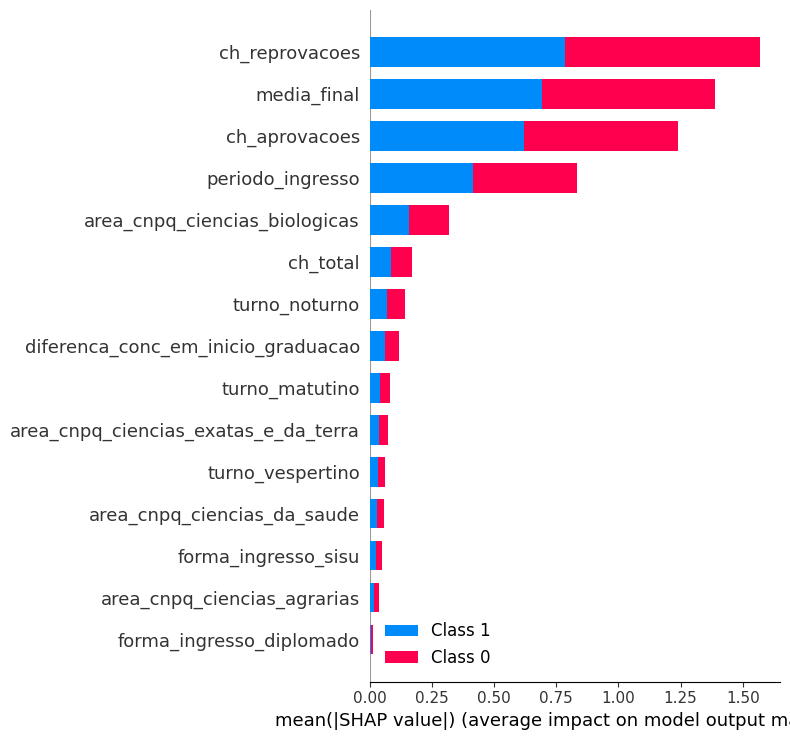

In [7]:
background_summary = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(voting_classifier.predict_proba, background_summary, link="logit")
shap_values = explainer.shap_values(X_test.loc[0:4])
shap.summary_plot(shap_values, X_test.loc[0:4], max_display=15)